In [7]:
from datasets import load_dataset
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

In [10]:
train_dataset = load_dataset("OhWayTee/hierarchy-pairs", split="train")
test_dataset = load_dataset("OhWayTee/hierarchy-pairs", split="test")

Generating test split: 100%|██████████| 2169/2169 [00:00<00:00, 164722.25 examples/s]


In [4]:
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

In [5]:
model = BertForSequenceClassification.from_pretrained("OhWayTee/bert-taxonomy")

In [11]:
trainer = Trainer(
    model=model,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer
)

/tmp/ipykernel_139080/1510501462.py:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [12]:
predictions = trainer.predict(test_dataset)
pred_labels = predictions.predictions.argmax(-1)  # Convert logits to labels
true_labels = test_dataset['label']

/home/s2416084/miniconda3/envs/bert/lib/python3.12/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


In [14]:
accuracy = accuracy_score(true_labels, pred_labels)
precision, recall, f1, _ = precision_recall_fscore_support(true_labels, pred_labels, average="weighted")

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9825
Precision: 0.9827
Recall: 0.9825
F1 Score: 0.9825


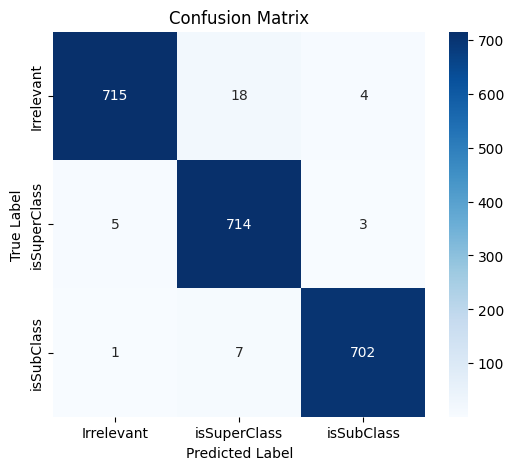

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(true_labels, pred_labels)

# Plot
plt.figure(figsize=(6, 5))
label_map = {"Irrelevant": 0, "isSuperClass": 1, "isSubClass": 2}
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_map.keys(), yticklabels=label_map.keys())
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()